In [155]:
# Imports
from tflite_support.task import vision
from tflite_support.task import core
from tflite_support.task import processor
import os
import random

# Initialization
base_options = core.BaseOptions(file_name='./model.tflite')
detection_options = processor.DetectionOptions(max_results=5)
options = vision.ObjectDetectorOptions(base_options=base_options, detection_options=detection_options)
detector = vision.ObjectDetector.create_from_options(options)

# Alternatively, you can create an object detector in the following manner:
# detector = vision.ObjectDetector.create_from_file(model_path)



In [160]:
# Run inference
get_image = os.listdir('recorded_images')
rand = random.choice(get_image)
print(rand)
image = vision.TensorImage.create_from_file('recorded_images/' + rand)
if image == None:
    print('Image not found')
    # remove image from list
    os.remove('recorded_images/' + rand)
else:
    detection_result = detector.detect(image)

image_0783.png


In [153]:
print(detection_result)
print(len(detection_result.detections))

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=209, origin_y=105, width=109, height=93), categories=[Category(index=0, score=0.9715902209281921, display_name='', category_name='pringles')]), Detection(bounding_box=BoundingBox(origin_x=337, origin_y=14, width=328, height=290), categories=[Category(index=4, score=0.9610419869422913, display_name='', category_name='principe')]), Detection(bounding_box=BoundingBox(origin_x=63, origin_y=150, width=143, height=114), categories=[Category(index=5, score=0.9207950830459595, display_name='', category_name='cocacola')]), Detection(bounding_box=BoundingBox(origin_x=360, origin_y=7, width=142, height=119), categories=[Category(index=2, score=0.7767720222473145, display_name='', category_name='destop')]), Detection(bounding_box=BoundingBox(origin_x=-1, origin_y=231, width=71, height=92), categories=[Category(index=2, score=0.6531423330307007, display_name='', category_name='destop')]), Detection(bounding_box=BoundingBox(orig

In [3]:
import cv2
import matplotlib.pyplot as plt

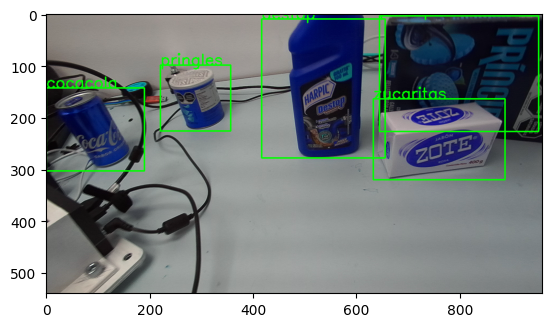

In [161]:
# Display the results
img = cv2.imread('recorded_images/' + rand)
for i in range(len(detection_result.detections)):
    box = detection_result.detections[i].bounding_box
    cv2.rectangle(img, (box.origin_x, box.origin_y), (box.origin_x + box.width, box.origin_y + box.height), (0, 255, 0), 2)
    cv2.putText(img, detection_result.detections[i].categories[0].category_name, (box.origin_x, box.origin_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
# show image normal
plt.imshow(img)
#cv2.imshow('img', img)
